# Numerical solution of projectile motion with the drag force

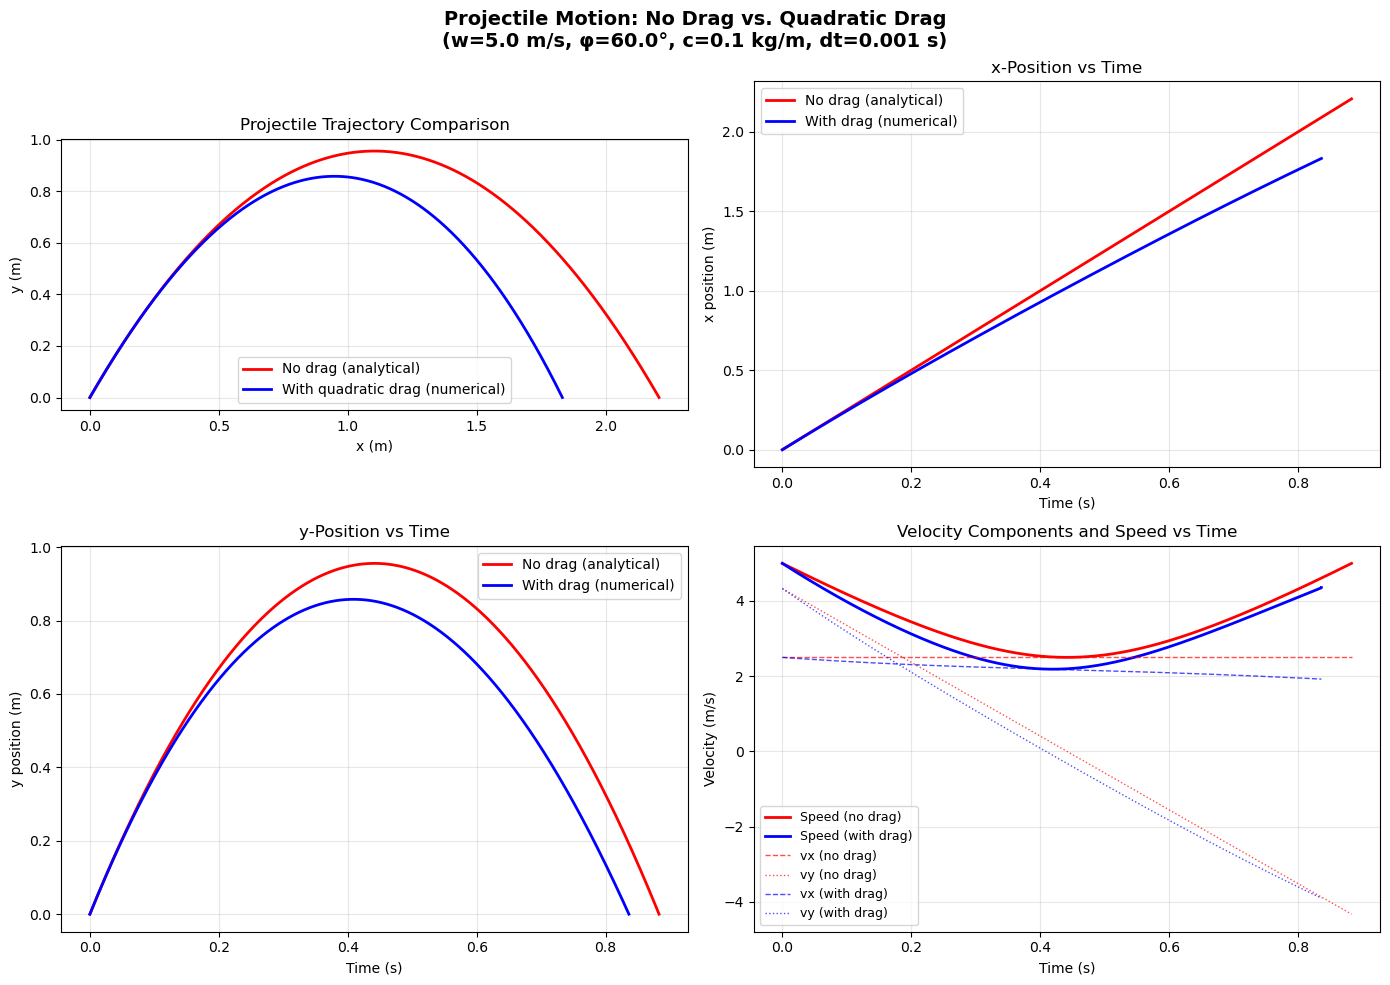

=== PROJECTILE MOTION COMPARISON ===
Initial conditions:
  Launch speed: 5.0 m/s
  Launch angle: 60.0°
  Initial velocity: vx0 = 2.50 m/s, vy0 = 4.33 m/s
  Drag coefficient: c = 0.1 kg/m
  Time step: 0.001 s

No drag (analytical solution):
  Flight time: 0.883 s
  Range: 2.207 m
  Maximum height: 0.956 m

With quadratic drag (numerical solution):
  Flight time: 0.836 s
  Range: 1.832 m
  Maximum height: 0.858 m

Drag effects:
  Flight time reduction: 0.047 s (5.3%)
  Range reduction: 0.375 m (17.0%)
  Max height reduction: 0.098 m (10.2%)

Final impact speeds:
  No drag: 5.00 m/s
  With drag: 4.36 m/s
  Speed reduction: 0.64 m/s (12.9%)

Note: Adjust the drag coefficient 'c' to see different drag effects.
      Typical values: c = 0.01 (light drag), c = 0.1 (moderate), c = 0.5 (heavy drag)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mass = 1.0  # kg
g = 9.81    # m/s^2 (gravitational acceleration)
w = 5.0     # m/s (initial speed)
phi = np.pi/3  # rad (launch angle)
c = 0.1     # drag coefficient (kg/m) - adjust this to see different drag effects

# Initial conditions
x0, y0 = 0.0, 0.0  # initial position
vx0 = w * np.cos(phi)  # initial x-velocity
vy0 = w * np.sin(phi)  # initial y-velocity

# Time parameters
dt = 0.001  # smaller time step for better accuracy with drag
t_max = 2 * vy0 / g  # theoretical flight time without drag
t_analytical = np.linspace(0, t_max, 1000)

# Numerical integration with drag using explicit Euler method
def euler_integration_with_drag(dt, t_max_estimate):
    """Integrate projectile motion with quadratic drag using explicit Euler method"""
    n_steps = int(t_max_estimate / dt) * 2  # extra steps since drag reduces flight time
    
    # Initialize arrays
    t = np.zeros(n_steps)
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    vx = np.zeros(n_steps)
    vy = np.zeros(n_steps)
    
    # Initial conditions
    x[0], y[0] = x0, y0
    vx[0], vy[0] = vx0, vy0
    
    # Euler integration
    for i in range(1, n_steps):
        t[i] = i * dt
        
        # Calculate current speed and drag force
        v_mag = np.sqrt(vx[i-1]**2 + vy[i-1]**2)
        
        if v_mag > 0:  # avoid division by zero
            # Drag force components: F_drag = -c * v^2 * (v_unit)
            drag_force_x = -c * v_mag * vx[i-1]  # drag opposes velocity
            drag_force_y = -c * v_mag * vy[i-1]
            
            # Accelerations: a = F/m
            ax = drag_force_x / mass
            ay = -g + drag_force_y / mass  # gravity + drag
        else:
            ax, ay = 0, -g
        
        # Update velocities
        vx[i] = vx[i-1] + ax * dt
        vy[i] = vy[i-1] + ay * dt
        
        # Update positions
        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
        
        # Stop if projectile hits ground
        if y[i] < 0:
            # Linear interpolation to find exact ground impact
            t_impact = t[i-1] - y[i-1] * (t[i] - t[i-1]) / (y[i] - y[i-1])
            x_impact = x[i-1] + vx[i-1] * (t_impact - t[i-1])
            
            # Trim arrays to actual flight time
            actual_steps = i + 1
            t[i] = t_impact
            x[i] = x_impact
            y[i] = 0.0
            return (t[:actual_steps], x[:actual_steps], y[:actual_steps], 
                   vx[:actual_steps], vy[:actual_steps])
    
    return t, x, y, vx, vy

# Analytical solution (no drag)
def analytical_solution_no_drag(t):
    """Calculate exact projectile motion without drag"""
    x_exact = vx0 * t
    y_exact = y0 + vy0 * t - 0.5 * g * t**2
    vx_exact = vx0 * np.ones_like(t)
    vy_exact = vy0 - g * t
    return x_exact, y_exact, vx_exact, vy_exact

# Perform numerical integration with drag
t_drag, x_drag, y_drag, vx_drag, vy_drag = euler_integration_with_drag(dt, t_max)

# Calculate analytical solution without drag
x_no_drag, y_no_drag, vx_no_drag, vy_no_drag = analytical_solution_no_drag(t_analytical)

# Create plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Projectile Motion: No Drag vs. Quadratic Drag\n(w={w} m/s, φ={phi*180/np.pi:.1f}°, c={c} kg/m, dt={dt} s)', 
             fontsize=14, fontweight='bold')

# Plot 1: Trajectory in x-y plane
ax1.plot(x_no_drag, y_no_drag, 'r-', linewidth=2, label='No drag (analytical)')
ax1.plot(x_drag, y_drag, 'b-', linewidth=2, label='With quadratic drag (numerical)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Projectile Trajectory Comparison')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

# Plot 2: x-position vs time
ax2.plot(t_analytical, x_no_drag, 'r-', linewidth=2, label='No drag (analytical)')
ax2.plot(t_drag, x_drag, 'b-', linewidth=2, label='With drag (numerical)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('x position (m)')
ax2.set_title('x-Position vs Time')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: y-position vs time
ax3.plot(t_analytical, y_no_drag, 'r-', linewidth=2, label='No drag (analytical)')
ax3.plot(t_drag, y_drag, 'b-', linewidth=2, label='With drag (numerical)')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('y position (m)')
ax3.set_title('y-Position vs Time')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Speed vs time
speed_no_drag = np.sqrt(vx_no_drag**2 + vy_no_drag**2)
speed_drag = np.sqrt(vx_drag**2 + vy_drag**2)

ax4.plot(t_analytical, speed_no_drag, 'r-', linewidth=2, label='Speed (no drag)')
ax4.plot(t_drag, speed_drag, 'b-', linewidth=2, label='Speed (with drag)')
ax4.plot(t_analytical, vx_no_drag, 'r--', linewidth=1, alpha=0.7, label='vx (no drag)')
ax4.plot(t_analytical, vy_no_drag, 'r:', linewidth=1, alpha=0.7, label='vy (no drag)')
ax4.plot(t_drag, vx_drag, 'b--', linewidth=1, alpha=0.7, label='vx (with drag)')
ax4.plot(t_drag, vy_drag, 'b:', linewidth=1, alpha=0.7, label='vy (with drag)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Velocity (m/s)')
ax4.set_title('Velocity Components and Speed vs Time')
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=9)

plt.tight_layout()
plt.show()

# Calculate and display key results
flight_time_no_drag = 2 * vy0 / g
range_no_drag = vx0 * flight_time_no_drag
max_height_no_drag = (vy0**2) / (2 * g)

flight_time_with_drag = t_drag[-1]
range_with_drag = x_drag[-1]
max_height_with_drag = np.max(y_drag)

print("=== PROJECTILE MOTION COMPARISON ===")
print(f"Initial conditions:")
print(f"  Launch speed: {w:.1f} m/s")
print(f"  Launch angle: {phi*180/np.pi:.1f}°")
print(f"  Initial velocity: vx0 = {vx0:.2f} m/s, vy0 = {vy0:.2f} m/s")
print(f"  Drag coefficient: c = {c} kg/m")
print(f"  Time step: {dt} s")

print(f"\nNo drag (analytical solution):")
print(f"  Flight time: {flight_time_no_drag:.3f} s")
print(f"  Range: {range_no_drag:.3f} m")
print(f"  Maximum height: {max_height_no_drag:.3f} m")

print(f"\nWith quadratic drag (numerical solution):")
print(f"  Flight time: {flight_time_with_drag:.3f} s")
print(f"  Range: {range_with_drag:.3f} m")
print(f"  Maximum height: {max_height_with_drag:.3f} m")

print(f"\nDrag effects:")
print(f"  Flight time reduction: {flight_time_no_drag - flight_time_with_drag:.3f} s ({((flight_time_no_drag - flight_time_with_drag)/flight_time_no_drag)*100:.1f}%)")
print(f"  Range reduction: {range_no_drag - range_with_drag:.3f} m ({((range_no_drag - range_with_drag)/range_no_drag)*100:.1f}%)")
print(f"  Max height reduction: {max_height_no_drag - max_height_with_drag:.3f} m ({((max_height_no_drag - max_height_with_drag)/max_height_no_drag)*100:.1f}%)")

# Final velocities comparison
final_speed_no_drag = w  # speed at impact equals initial speed (energy conservation)
final_speed_with_drag = np.sqrt(vx_drag[-1]**2 + vy_drag[-1]**2)
print(f"\nFinal impact speeds:")
print(f"  No drag: {final_speed_no_drag:.2f} m/s")
print(f"  With drag: {final_speed_with_drag:.2f} m/s")
print(f"  Speed reduction: {final_speed_no_drag - final_speed_with_drag:.2f} m/s ({((final_speed_no_drag - final_speed_with_drag)/final_speed_no_drag)*100:.1f}%)")

print(f"\nNote: Adjust the drag coefficient 'c' to see different drag effects.")
print(f"      Typical values: c = 0.01 (light drag), c = 0.1 (moderate), c = 0.5 (heavy drag)")